In [1]:
# IMPORT STATEMENTS
import re
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon")
sys.path.append("../")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']
try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [74]:
import bone
reload(bone)
class BEeacAnalysis(bone.IBDAnalysis):

    def __init__(self):
        bone.IBDAnalysis.__init__(self)

    def printInfo(self):
        print(self.name + " (n = " + str(self.num) + ")")
        url = "http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id="
        if self.dbid.startswith("GL"):
            url = "http://hegemon.ucsd.edu/Tools/explore.php?key=global&id="
        print(self.source + " " + url + self.dbid)
        print(len(self.order), [len(i) for i in self.state], \
                self.source, url + self.dbid, self.dbid)
        return

    def getCummings2017(self, tn=1):
        self.prepareData("BES20", cfile="explore.conf")
        atype = self.h.getSurvName('c tissue (ch1)')
        atypes = ['N', 'BE']
        ahash = {"Barrett's esophagus segment":1, 'Normal esophageal squamous mucosa':0}
        self.initData(atype, atypes, ahash)
        return
    
    def getMaag2017(self, tn=1):
        self.prepareData("BES21", cfile="explore.conf")
        atype = self.h.getSurvName('c Characteristics[disease]')
        atypes = ['N', 'BE', 'EAC']
        ahash = {'normal':0, "Barrett's esophagus":1,
                 'esophageal adenocarcinoma ':2}
        if (tn == 2):
            atypes = ['BE', 'EAC']
            ahash = {"Barrett's esophagus":0,
                     'esophageal adenocarcinoma ':1}
        if (tn == 3):
            atypes = ['N', 'BE']
            ahash = {'normal':0, "Barrett's esophagus":1}
        if (tn == 4):
            atypes = ['N', 'EAC']
            ahash = {'normal':0,
                     'esophageal adenocarcinoma ':1}
        if tn == 5:
            atype = self.h.getSurvName('c Disease')
            ahash = {'normal':0, "Barrett's esophagus low-grade dysplasia":2,
                     "Barrett's esophagus non-dysplastic":1,
                     'esophageal adenocarcinoma':3}
            atypes = ['N', 'NDBE', 'BE-D', 'EAC']
        if tn == 6:
            atype = self.h.getSurvName('c Disease')
            ahash = {'normal':0, "Barrett's esophagus non-dysplastic":1}
            atypes = ['N', 'NDBE']
        if tn == 7:
            atype = self.h.getSurvName('c Disease')
            ahash = {"Barrett's esophagus low-grade dysplasia":1,
                     "Barrett's esophagus non-dysplastic":0}
            atypes = ['NDBE', 'BE-D']
        if tn == 8:
            atype = self.h.getSurvName('c Disease')
            ahash = {"Barrett's esophagus low-grade dysplasia":0,
                     'esophageal adenocarcinoma':1}
            atypes = ['BE-D', 'EAC']
        self.initData(atype, atypes, ahash)
        return

    def getHyland2014(self, tn=1):
        self.prepareData("BES22", cfile="explore.conf")
        atype = self.h.getSurvName('c cell type (ch1)')
        ahash = {"BE":1, "NE":0}
        atypes = ['N', 'BE']
        if tn == 2:
            atypes = ['N', 'BE', 'GC']
            ahash = {"BE":1, "NE":0, "NC":2}
        if tn == 3:
            atypes = ['NE', 'GC']
            ahash = {"NE":0, "NC":1}
        self.initData(atype, atypes, ahash)
        return
    

In [23]:
ana = BEeacAnalysis()
ana.getCummings2017()
ana.getMaag2017()
ana.getHyland2014()

Cummings 2017 BE Human (n = 76)
GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20
76 [36, 40] GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20 BES20
Maag 2017 EAC and Barrett's (n = 63)
E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21
63 [19, 27, 17] E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21 BES21
Hyland 2014 BE compared to normal mucosa (n = 120)
GSE39491 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES22
80 [40, 40] GSE39491 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES22 BES22


In [7]:
nodes, edges = bone.BIGraph.readEqGraph("bes-net-res.txt")
df = bone.BIGraph.pruneEqGraph(edges)
df.to_csv("bes-net-1-eq.txt", sep="\t", header=False, index=False)
thr = hu.getThrData(df[1])
print(thr)
cls = bone.BIGraph.getClusters(df)
bone.BIGraph.saveClusters("bes-net-1-cls.txt", cls)
cfile = "bes-net.rl"
net = bone.BINetwork(cfile)
net.init()
cg = bone.BIGraph.getClustersGraph(net, cls)
cg.to_csv("bes-net-1-eq-g.txt", sep="\t", header=False, index=False)

2282936 edges Processed
[0.5198571127908631, 6823.8511123178805, 0.019857112790863107, 1.019857112790863]


In [11]:
df = pd.read_csv("bes-net-1-eq.txt", sep="\t", header=None)
thr = hu.getThrData(df[1])
print(thr)
cls = bone.BIGraph.getClusters(df, 0.8)
bone.BIGraph.saveClusters("bes-net-1-cls.txt", cls)

[0.5198571127908631, 6823.8511123178805, 0.019857112790863107, 1.019857112790863]


In [12]:
cls = bone.BIGraph.readClusters("bes-net-1-cls.txt")
cfile = "bes-net.rl"
net = bone.BINetwork(cfile)
net.init()
cg = bone.BIGraph.getClustersGraph(net, cls)
cg.to_csv("bes-net-1-eq-g.txt", sep="\t", header=False, index=False)

In [16]:
edges, clusters, nodep = bone.BIGraph.readClustersGraphFile("bes-net-1")
ana = BEeacAnalysis()
ana.getCummings2017()
df = pd.read_csv(ana.h.rdataset.getVInfo(), sep="\t")
c1 = 'ProbeID'
df = df[df[c1] != c1]
dr = pd.to_numeric(df['97.5%']) - pd.to_numeric(df['2.5%'])
ids = df[c1]
dr.index = [str(k) for k in ids]
G = bone.BIGraph.getBINGraph(ana, edges, clusters, dr)
bone.BIGraph.writeGML(G, "bes-net-1.gml")
bone.BIGraph.visualizeNetwork(G, ofile="bes-nx.html")

2568 Processed
Processing edges...
96127 edges processed
Cummings 2017 BE Human (n = 76)
GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20
76 [36, 40] GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20 BES20
1082 3.7533332700000006 ['8093278', '7978718']
225 7.884540384 ['8093278', '8179861']
221 3.691867628 ['7896642', '8099218']
83 1.7637108460000004 ['7894634', '7896483']
76 2.718203763 ['7895561', '7894494']
64 3.8058941379999984 ['8179861', '8121416']
58 2.8434601159999993 ['8179861', '8075633']
30 4.607023276000001 ['7896642', '8161384']
25 5.073796258 ['8099218', '8013348']
20 3.1578809240000005 ['8121416', '7895561']
['7896642', '8177331', '7892789']
['8093278', '8123951']
['7978718', '8101852', '8154135']
['8109049', '7892723']
['8179861', '8146986', '8101852', '8154135']
['8099218', '8097062', '8144388', '8161384', '8177331', '7892789']
['7894634', '7895411', '7896101']
['7896483', '7896616']
['8078214', '7893500']
['7895561']
['7894494']


In [17]:
edges, clusters, nodep = bone.BIGraph.readClustersGraphFile("bes-net-1")
ana = BEeacAnalysis()
ana.getCummings2017()
df = pd.read_csv(ana.h.rdataset.getVInfo(), sep="\t")
c1 = 'ProbeID'
df = df[df[c1] != c1]
dr = pd.to_numeric(df['97.5%']) - pd.to_numeric(df['2.5%'])
ids = df[c1]
dr.index = [str(k) for k in ids]
G = bone.BIGraph.getBINGraphGML(ana, edges, clusters, dr)
bone.BIGraph.writeGML(G, "bes-net-paper.gml")

2568 Processed
Processing edges...
96127 edges processed
Cummings 2017 BE Human (n = 76)
GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20
76 [36, 40] GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20 BES20
1082 3.7533332700000006 ['8093278', '7978718']
225 7.884540384 ['8093278', '8179861']
221 3.691867628 ['7896642', '8099218']
83 1.7637108460000004 ['7894634', '7896483']
76 2.718203763 ['7895561', '7894494']
64 3.8058941379999984 ['8179861', '8121416']
58 2.8434601159999993 ['8179861', '8075633']
30 4.607023276000001 ['7896642', '8161384']
25 5.073796258 ['8099218', '8013348']
20 3.1578809240000005 ['8121416', '7895561']
['7896642', '8177331', '7892789']
['8093278', '8123951']
['7978718', '8101852', '8154135']
['8109049', '7892723']
['8179861', '8146986', '8101852', '8154135']
['8099218', '8097062', '8144388', '8161384', '8177331', '7892789']
['7894634', '7895411', '7896101']
['7896483', '7896616']
['8078214', '7893500']
['7895561']
['7894494']


In [29]:
ana = BEeacAnalysis()
ana.getCummings2017()
ana1 = BEeacAnalysis()
ana1.getHyland2014()
res = []
index = 0
for k in G:
    print(index, k, ana.h.getSimpleName(k))
    l1 = [clusters[k]]
    l1 = [[ana.h.getSimpleName(i) for i in l1[0]]]
    l1 = [[i for i in l1[0] if i != "---"]]
    wt1 = [1]
    c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana1, l1, wt1)
    res += [[c_dict, fpr, tpr, roc_auc]]
    index +=1
ana = ana1
actual = [1 if ana.aval[i] >= 1 else 0 for i in ana.i1]
data_list = { 'y': actual }
res2 = []
for i in range(len(G)):
    id1 = 'c' + str(i)
    c = [res[i][0][j] for j in ana.i1]
    data_list[id1] = c
    res2 += [id1]
df1 = pd.DataFrame(data_list)
#df2 = bone.printOLS('y ~ ' + '+'.join(res2) , df1)
i1 = ana.i1
ana = BEeacAnalysis()
ana.getCummings2017()
l1 = [ana.h.getSimpleName(k) for k in clusters['8179861']]
l1 = [i for i in l1 if i != "---"]
l2 = [ana.h.getSimpleName(k) for k in clusters['8109049']]
l2 = [i for i in l2 if i != "---"]
l1 = [l1, l2]
wt1 = [1, -1]
c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana1, l1, wt1)
c = [c_dict[j] for j in i1]
df1['a1'] = c
#df2 = bone.printOLS('y ~ c3', df1)

Cummings 2017 BE Human (n = 76)
GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20
76 [36, 40] GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20 BES20
Hyland 2014 BE compared to normal mucosa (n = 120)
GSE39491 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES22
80 [40, 40] GSE39491 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES22 BES22
0 7896642 ---
[104]
ROC-AUC 0.40
[-20.992469235134106, 43.38433923295096, -21.492469235134106, -20.492469235134106]
8.602626148888348 -20.992469235134106
1 8093278 HGD
[288]
ROC-AUC 0.90
[-89.81881597500778, 198.24635385255775, -90.31881597500778, -89.31881597500778]
11.737115310155595 -89.81881597500778
2 7978718 SEC23A
[21]
ROC-AUC 0.88
[-4.4899925688378834, 78.1051486893403, -4.9899925688378834, -3.9899925688378834]
1.347937009193398 -4.4899925688378834
3 8109049 SPINK7
[273]
ROC-AUC 0.13
[-48.95257669786753, 233.31123046581578, -49.45257669786753, -48.45257669786753]
12.722082553436739 -48.952576

In [30]:
ana = BEeacAnalysis()
ana.getCummings2017()
l1 = [ana.h.getSimpleName(k) for k in clusters['8179861']]
beup = [i for i in l1 if i != "---"]
l2 = [ana.h.getSimpleName(k) for k in clusters['8109049']]
bedown = [i for i in l2 if i != "---"]
l1 = [beup, bedown]

Cummings 2017 BE Human (n = 76)
GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20
76 [36, 40] GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20 BES20


In [31]:
len(beup),len(bedown)

(24, 220)

Cummings 2017 BE Human (n = 76)
GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20
76 [36, 40] GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20 BES20
[26, 248]


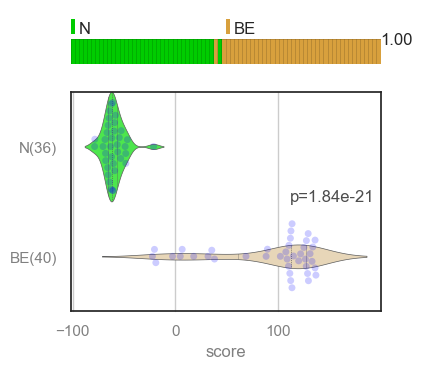

In [32]:
wt1, l1 = [1, -1], [beup, bedown]
ana = BEeacAnalysis()
ana.getCummings2017()
fig = bone.processData(ana, l1, wt1, None, 1)

In [34]:
def getEntries(cfile, index):
    import os
    if not os.path.isfile(cfile):
        print("Can't open file {0} <br>".format(cfile))
        exit()
    fp = open(cfile, "r")
    res = []
    for line in fp:
        line = line.strip();
        ll = re.split("[\t]", line);
        if index < len(ll):
            res += [ll[index]]
        else:
            res += ['']
    fp.close();
    return res

down = [k for k in bone.getEntries("sen-deg.txt", 0)[5:]
        if k != '']
up = [k for k in getEntries("sen-deg.txt", 4)[5:]
        if k != '']
len(up), len(down)

(472, 528)

Cummings 2017 BE Human (n = 76)
GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20
76 [36, 40] GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20 BES20
[451, 528]


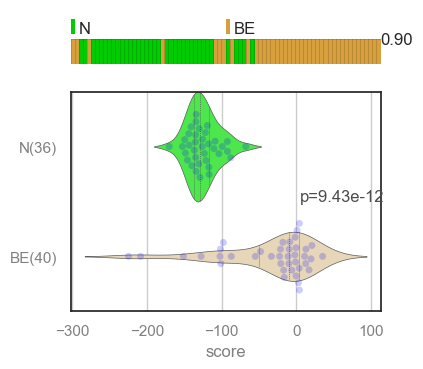

In [37]:
wt1, l1 = [-1, 1], [up, down]
ana = BEeacAnalysis()
ana.getCummings2017()
fig = bone.processData(ana, l1, wt1, None, 1)

In [40]:
print(len(beup))
print(" ".join(beup))
print(len(bedown))
print(" ".join(bedown))
print(len(up))
print(" ".join(up))
print(len(down))
print(" ".join(down))
ana = BEeacAnalysis()
ana.getCummings2017()
l1 = [ana.h.getSimpleName(k) for k in ana.h.idhash]
allids = [i for i in l1 if i != "---"]
print(len(allids))
print(len(set(beup).intersection(down)))
print(len(set(bedown).intersection(up)))

24
SLC44A4 KRT8 VSIG1 SULT1C2 GOLM1 AGR2 SPINK1 TFF1 CYSTM1 ANXA10 PLA2G10 KIAA1324 CLDN18 MUC6 PROM1 TRIM31 TRIM31 CTSE TFF2 CA2 PIGR LGALS4 TSPAN1 TSPAN8
220
SPINK7 SERPINB3 MUC21 AQP3 IL1RN ADH7 RRAGD TMPRSS11B PTPN13 SPINK5 MTSS1 GRHL1 TPRG1 OGFRL1 KRT6A SRPX2 KLK11 SLC16A6 CLIC3 MUC21 PITX1 SPRR2B GRPEL2 PAX9 ZNF750 FAT2 RAET1E ZNF185 RORA SFN BHLHE40 RAB31 CAMSAP1 EXPH5 FAM83A GSDMC RASAL2 TP63 ATP6V1C2 PKP1 TMPRSS11F TMEM79 PIM1 PRSS27 BCKDHA TMEM40 KRT78 PRDM1 ARHGAP10 LYPD3 NCCRP1 CRISP3 IL20RB KLF8 KRT15 RARG EREG PALMD IL36A PGD PPP1R3C BNIPL NEBL TFAP2C RAB38 BNIP3 ALDH3B2 HSPB8 GYS2 SPRR2A PGLYRP3 FAM83D MGC57346 C18orf25 YBX3 ZNF431 CTTNBP2 SNAI2 RDX ANXA1 LGALS7B DSG1 SLURP1 TUBB6 CA12 P2RY2 SPRR1A CWH43 LY6D SASH1 TMEM109 TPD52L1 MID2 UPK1A GRHL3 DUOX1 TMEM154 IL1RAP DAPL1 BAIAP2 TMPRSS11A KLK10 PERP LPHN2 FAM129B ANXA8 RND3 VAT1 PRKCH FMO2 BARX2 CRABP2 AHNAK2 PMAIP1 POLR2J3 EPGN VSNL1 RHCG MAB21L3 ZNF426 GNA15 S100A11 MXD1 TGM3 CLCA4 FAM127A CDA TACSTD2 DSP DUSP5 CSTB 

Cummings 2017 BE Human (n = 76)
GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20
76 [36, 40] GSE100843 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES20 BES20
24520
4
68


In [41]:
from scipy.stats import hypergeom
p1 = 1 - hypergeom.cdf(68, 24520, 472, 220)
p2 = 1 - hypergeom.cdf(4, 24520, 528, 24)
p1, p2

(0.0, 0.00013758474479064198)

In [42]:
nodes, edges = bone.BIGraph.readEqGraph("eac-net-res.txt")
df = bone.BIGraph.pruneEqGraph(edges)
df.to_csv("eac-net-1-eq.txt", sep="\t", header=False, index=False)

2291564 edges Processed


In [53]:
df = pd.read_csv("eac-net-1-eq.txt", sep="\t", header=None)
thr = hu.getThrData(df[1])
print(thr)
cls = bone.BIGraph.getClusters(df, 0.5)
bone.BIGraph.saveClusters("eac-net-1-cls.txt", cls)

[0.5291085563530892, 5092.738658189097, 0.029108556353089177, 1.0291085563530893]


In [44]:
cls = bone.BIGraph.readClusters("eac-net-1-cls.txt")
cfile = "eac-net.rl"
net = bone.BINetwork(cfile)
net.init()
cg = bone.BIGraph.getClustersGraph(net, cls)
cg.to_csv("eac-net-1-eq-g.txt", sep="\t", header=False, index=False)

In [48]:
def getBINGraph(ana, edges, clusters, dr):
    import networkx as nx
    from networkx.drawing.nx_agraph import write_dot, graphviz_layout

    sclusters = {k:len(clusters[k]) for k in clusters}
    dclusters = {k:dr.loc[k] for k in clusters}
    def getW(k):
        return (-sclusters[k], -dclusters[k])
    def getS(k):
        return np.log(sclusters[k]+1)/np.log(1.5) + 2
    keys = sorted(sclusters, key=lambda k:getW(k))
    keys = [str(k) for k in keys]

    net = nx.DiGraph()
    for id1 in edges:
        id1 = str(id1)
        if '2' in edges[id1]:
            l1 = sorted(edges[id1]['2'], key=lambda k:getW(k))
            for id2 in l1:
                net.add_edge(id1, id2, rel='2')
        if 2 in edges[id1]:
            l1 = sorted(edges[id1][2], key=lambda k:getW(k))
            for id2 in l1:
                net.add_edge(id1, id2, rel='2')

    G = nx.DiGraph()
    for id1 in keys[1:10]:
        l1 = []
        if id1 in edges and '4' in edges[id1]:
            l1 += list(edges[id1]['4'].keys())
        if id1 in edges and '6' in edges[id1]:
            l1 += list(edges[id1]['6'].keys())
        if id1 in edges and 4 in edges[id1]:
            l1 += list(edges[id1][4].keys())
        if id1 in edges and 6 in edges[id1]:
            l1 += list(edges[id1][6].keys())
        l1 = list(set(l1))
        l2 = sorted(l1, key=lambda k:getW(k))[0:2]
        print (sclusters[id1], dclusters[id1], l2)
        for id2 in l2:
            G.add_node(id1, label=ana.h.getSimpleName(id1), 
                       size=getS(id1), title='hilo', group=1)
            G.add_node(id2, label=ana.h.getSimpleName(id1),
                       size=getS(id2), title='hilo', group=1)
            G.add_edge(id1, id2, rel='4', color='red')

    l1 = [str(k) for k in list(G)]
    for id1 in l1:
        if id1 not in net:
            continue
        l2 = bone.BIGraph.getPath(net, id1, l1)
        print(l2)
        t1 = id1
        for id2 in l2[1:]:
            G.add_node(t1, label=ana.h.getSimpleName(t1), 
                       size=getS(id1), title='lolo', group=2)
            G.add_node(id2, label=ana.h.getSimpleName(id1),
                       size=getS(id2), title='lolo', group=2)
            G.add_edge(t1, id2, rel='2', color='blue',
                      arrows={'to':{'enabled':True, 'type':'arrow'}})
            t1 = id2
            
    return G

In [54]:
gfile = "eac-net-1"
edges, clusters, nodep = bone.BIGraph.readClustersGraphFile(gfile)
ana = BEeacAnalysis()
ana.getMaag2017()
df = pd.read_csv(ana.h.rdataset.getVInfo(), sep="\t")
c1 = 'ProbeID'
df = df[df[c1] != c1]
dr = pd.to_numeric(df['97.5%']) - pd.to_numeric(df['2.5%'])
ids = df[c1]
dr.index = [str(k) for k in ids]
G = getBINGraph(ana, edges, clusters, dr)
bone.BIGraph.writeGML(G, "eac-net-1.gml")
bone.BIGraph.visualizeNetwork(G, "eac-nx.html")

1761 Processed
Processing edges...
26129 edges processed
Maag 2017 EAC and Barrett's (n = 63)
E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21
63 [19, 27, 17] E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21 BES21
471 4.4897984 ['ENSG00000153551', 'ENSG00000217165']
39 8.559788900000001 ['ENSG00000244040', 'ENSG00000271573']
36 6.644552 ['ENSG00000244040', 'ENSG00000186481']
31 3.6590235 []
30 2.8859711999999997 []
24 5.0924195999999995 ['ENSG00000236699', 'ENSG00000230316']
22 5.5591817 []
19 9.315049600000002 []
19 4.1806109000000005 []
['ENSG00000072201', 'ENSG00000186352']
['ENSG00000153551', 'ENSG00000196549', 'ENSG00000196932']
['ENSG00000165092', 'ENSG00000197520', 'ENSG00000254872', 'ENSG00000197253', 'ENSG00000251350']
['ENSG00000244040', 'ENSG00000271573']
['ENSG00000271573']
['ENSG00000197520', 'ENSG00000254872', 'ENSG00000197253', 'ENSG00000251350']
['ENSG00000186481', 'ENSG00000244040', 'ENSG00000271573']
['ENSG00000236699', 'ENS

In [56]:
edges, clusters, nodep = bone.BIGraph.readClustersGraphFile("eac-net-1")
ana = BEeacAnalysis()
ana.getMaag2017()
df = pd.read_csv(ana.h.rdataset.getVInfo(), sep="\t")
c1 = 'ProbeID'
df = df[df[c1] != c1]
dr = pd.to_numeric(df['97.5%']) - pd.to_numeric(df['2.5%'])
ids = df[c1]
dr.index = [str(k) for k in ids]
G = bone.BIGraph.getBINGraphGML(ana, edges, clusters, dr)
def addToGraph(G, ana, edges, clusters, dr):
    import networkx as nx
    from networkx.drawing.nx_agraph import write_dot, graphviz_layout

    sclusters = {k:len(clusters[k]) for k in clusters}
    dclusters = {k:dr.loc[k] for k in clusters}
    def getW(k):
        return (-sclusters[k], -dclusters[k])
    def getS(k):
        return np.log(sclusters[k]+1)/np.log(1.5) + 2
    keys = sorted(sclusters, key=lambda k:getW(k))
    keys = [str(k) for k in keys]
    id1 = 'ENSG00000110324'
    id1 = 'ENSG00000105851'
    id2 = 'ENSG00000204577'
    id3 = 'ENSG00000072201'
    G.add_node(id1, name=ana.h.getSimpleName(id1),
               graphics = {'x': 0, 'y': 0, 'w': getS(id1), 'h': getS(id1),
                           'type': 'ellipse', 'fill': '#889999', 'outline': '#666666',
                           'outline_width': 1.0})
    G.add_node(id2, name=ana.h.getSimpleName(id2),
               graphics = {'x': 0, 'y': 0, 'w': getS(id2), 'h': getS(id2),
                           'type': 'ellipse', 'fill': '#889999', 'outline': '#666666',
                           'outline_width': 1.0})
    G.add_edge(id3, id2, rel='4', 
               graphics={'width': 1.0, 'fill': '#ff0000', 'type': 'line',
                        'source_arrow': 0, 'target_arrow': 0})
    G.add_edge(id1, id2, rel='2', 
               graphics={'width': 1.0, 'fill': '#0000ff', 'type': 'line',
                         'source_arrow': 0, 'target_arrow': 1})
    return G
G = addToGraph(G, ana, edges, clusters, dr)
bone.BIGraph.writeGML(G, "eac-net-paper.gml")

1761 Processed
Processing edges...
26129 edges processed
Maag 2017 EAC and Barrett's (n = 63)
E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21
63 [19, 27, 17] E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21 BES21
1711 6.014342 ['ENSG00000244040', 'ENSG00000284485']
471 4.4897984 ['ENSG00000153551', 'ENSG00000217165']
39 8.559788900000001 ['ENSG00000244040', 'ENSG00000271573']
36 6.644552 ['ENSG00000244040', 'ENSG00000186481']
31 3.6590235 []
30 2.8859711999999997 []
24 5.0924195999999995 ['ENSG00000236699', 'ENSG00000230316']
22 5.5591817 []
19 9.315049600000002 []
19 4.1806109000000005 []
['ENSG00000236699', 'ENSG00000254560', 'ENSG00000256802', 'ENSG00000260912', 'ENSG00000197253', 'ENSG00000251350']
['ENSG00000244040', 'ENSG00000271573']
['ENSG00000284485']
['ENSG00000072201', 'ENSG00000284485']
['ENSG00000153551', 'ENSG00000196549', 'ENSG00000196932']
['ENSG00000165092', 'ENSG00000197520', 'ENSG00000254872', 'ENSG00000197253', 'ENSG00000

In [57]:
ana = BEeacAnalysis()
ana.getMaag2017(2)
res = []
index = 0
for k in G:
    print(index, k, ana.h.getSimpleName(k))
    l1 = [clusters[k]]
    l1 = [[ana.h.getSimpleName(i) for i in l1[0]]]
    l1 = [[i for i in l1[0] if i != "---"]]
    wt1 = [1]
    c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l1, wt1)
    res += [[c_dict, fpr, tpr, roc_auc]]
    index +=1
actual = [1 if ana.aval[i] >= 1 else 0 for i in ana.i1]
data_list = { 'y': actual }
res2 = []
for i in range(len(G)):
    id1 = 'c' + str(i)
    c = [res[i][0][j] for j in ana.i1]
    data_list[id1] = c
    res2 += [id1]
df1 = pd.DataFrame(data_list)
df2 = bone.printOLS('y ~ ' + '+'.join(res2) , df1)

Maag 2017 EAC and Barrett's (n = 63)
E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21
44 [27, 17] E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21 BES21
0 ENSG00000236699 ARHGEF38
[1712]
ROC-AUC 0.51
[-231.03182600172997, 25.60963013778137, -231.53182600172997, -230.53182600172997]
83.69181129902701 -231.03182600172997
1 ENSG00000244040 IL12A-AS1
[24]
ROC-AUC 0.51
[-7.504423462770357, 25.477947896990642, -8.004423462770358, -7.004423462770357]
1.243890025519956 -7.504423462770357
2 ENSG00000284485 MIR205
[1]
ROC-AUC 0.40
[-0.31265750854393737, 122.64565417349303, -0.8126575085439374, 0.18734249145606263]
0.05956383444881167 -0.31265750854393737
3 ENSG00000072201 LNX1
[471]
ROC-AUC 0.46
[-107.67320837381544, 61.9214167586887, -108.17320837381544, -107.17320837381544]
24.45561514814842 -107.67320837381544
4 ENSG00000153551 CMTM7
[1]
ROC-AUC 0.84
[-0.03690680918270746, 26.385939988829957, -0.5369068091827075, 0.46309319081729255]
0.0821888272062

In [60]:
cls = bone.BIGraph.readClusters("eac-net-1-cls.txt")
ana = BEeacAnalysis()
ana.getMaag2017()
#l1 = [ana.h.getSimpleName(k) for k in cls['ENSG00000110324'][1]]
l1 = [ana.h.getSimpleName(k) for k in cls['ENSG00000105851'][1]]
eac1 = [i for i in l1 if i != "---"]
l2 = [ana.h.getSimpleName(k) for k in cls['ENSG00000204577'][1]]
eac2 = [i for i in l2 if i != "---"]
wt1, l1 = [1, 1], [eac1, eac2]
bone.reactome(" ".join(eac1 + eac2)).head(20)

Maag 2017 EAC and Barrett's (n = 63)
E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21
63 [19, 27, 17] E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21 BES21


,name,count,pValue,fdr
0,Immune System,52,1.110223e-16,3.519407e-14
1,Neutrophil degranulation,22,5.417888e-14,8.560264e-12
2,Signaling by Interleukins,23,3.375522e-12,3.544298e-10
3,Innate Immune System,30,6.497702e-11,5.133185e-09
4,Interleukin-10 signaling,10,1.180713e-10,7.438494e-09
5,Interleukin-4 and Interleukin-13 signaling,12,4.710158e-09,2.449282e-07
6,Cytokine Signaling in Immune system,24,1.580916e-08,7.114124e-07
7,Peptide ligand-binding receptors,10,3.634768e-07,1.417559e-05
8,RUNX3 Regulates Immune Response and Cell Migra...,4,4.440744e-07,1.554260e-05
9,Chemokine receptors bind chemokines,6,1.265430e-06,3.922834e-05


In [77]:
print(len(eac1))
print(" ".join(eac1))
print(len(eac2))
print(" ".join(eac2))

30
IL10RA WIPF1 ST8SIA4 PIK3CG AOAH CD4 ITGA4 GIMAP6 TRPV2 LAIR1 CD84 FGL2 CD180 PTP4A3 FAM20C EMP3 CD14 MPEG1 OR2I1P NCKAP1L C1QC PDE3A BCAT1 ADGRE2 DOCK2 LILRB1 FLI1 CYBB TNFSF13B CSF2RB
31
LILRB3 LUCAT1 SDS FPR1 MMP1 SLC11A1 ADGRG3 MNDA FCGR3B ITGAX SNX10 SELL TLR2 CXCL8 FPR2 TDRD6 MEFV CXCR1 MMP3 CXCL2 AQP9 SPP1 MMP9 RIPOR2 INHBA BCL2A1 C5AR1 TREM1 PTGS2 CSF3R NLRC4


Maag 2017 EAC and Barrett's (n = 63)
E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21
63 [19, 27, 17] E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21 BES21
Maag 2017 EAC and Barrett's (n = 63)
E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21
44 [27, 17] E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21 BES21
[30, 31]


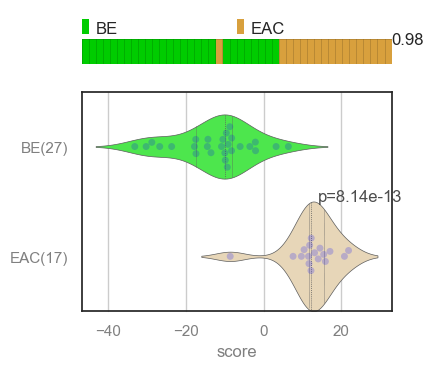

In [65]:
cls = bone.BIGraph.readClusters("eac-net-1-cls.txt")
ana = BEeacAnalysis()
ana.getMaag2017()
l1 = [ana.h.getSimpleName(k) for k in cls['ENSG00000110324'][1]]
#l1 = [ana.h.getSimpleName(k) for k in cls['ENSG00000105851'][1]]
eac1 = [i for i in l1 if i != "---"]
l2 = [ana.h.getSimpleName(k) for k in cls['ENSG00000204577'][1]]
eac2 = [i for i in l2 if i != "---"]
wt1, l1 = [1, 1], [eac1, eac2]
ana = BEeacAnalysis()
ana.getMaag2017(2)
fig = bone.processData(ana, l1, wt1, None, 1)

In [69]:
def plotBooleanPair(ana, id1, id2, pGroups=None, ax=None, thrx=None, thry=None, **kwargs):
    datax = ana.h.getExprData(id1)
    datay = ana.h.getExprData(id2)
    if thrx is None:
        thrx = ana.h.getThrData(id1)
    if thry is None:
        thry = ana.h.getThrData(id2)
    df1 = pd.DataFrame(columns=["x", "y", "c"])
    if pGroups is None:
        df = pd.DataFrame()
        df["x"] = pd.to_numeric(pd.Series(datax[2:]))
        df["y"] = pd.to_numeric(pd.Series(datay[2:]))
        df['c'] = "DarkBlue"
        df1 = df1.append(df)
    else:
        for k in range(len(pGroups)):
            df = pd.DataFrame()
            order = pGroups[k][2]
            val = [datax[i] for i in order]
            df["x"] = pd.to_numeric(pd.Series(val))
            val = [datay[i] for i in order]
            df["y"] = pd.to_numeric(pd.Series(val))
            df["c"] = pGroups[k][1]
            df1 = df1.append(df)
    if ax is None:
        w,h = (6.4, 4.8)
        dpi = 100
        fig = plt.figure(figsize=(w,h))
        ax = fig.add_axes([70.0/w/dpi, 54.0/h/dpi, 1-2*70.0/w/dpi, 1-2*54.0/h/dpi])
    ax = df1.plot.scatter(x='x', y='y', c=df1['c'], ax=ax, **kwargs)
    ax.set_xlabel(datax[0] + ": " + ana.h.getSimpleName(id1))
    ax.set_ylabel(datay[0] + ": " + ana.h.getSimpleName(id2))
    ax.set_title(ana.getTitle())
    ax.axhline(y=float(thry[0]), color='r')
    ax.axhline(y=float(thry[2]), color='cyan')
    ax.axhline(y=float(thry[3]), color='cyan')
    ax.axvline(x=float(thrx[0]), color='r')
    ax.axvline(x=float(thrx[2]), color='cyan')
    ax.axvline(x=float(thrx[3]), color='cyan')
    return ax

Maag 2017 EAC and Barrett's (n = 63)
E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21
63 [19, 27, 17] E-MTAB-4054 http://hegemon.ucsd.edu/Tools/explore.php?key=bes&id=BES21 BES21


[[19, 26, 0, 17],
 [13.790322580645162,
  31.20967741935484,
  5.209677419354839,
  11.790322580645162],
 [-1.0946114703124572,
  1.094147449472688,
  2.4919224344579503,
  -1.1770856601212452],
 [0.6815217391304348, 0.5780632411067194, 0.0, 0.6654040404040404]]

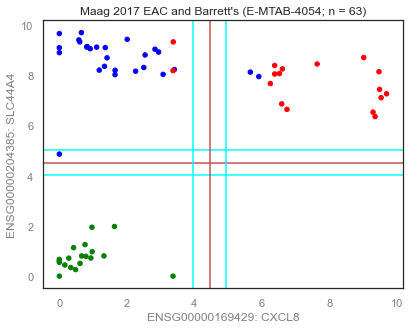

In [79]:
pdf = bone.getPDF("be-invariants.pdf")
ana = BEeacAnalysis()
ana.getMaag2017()
pG = [ ["Normal", "green", ana.state[0]],
      ["BE", "blue", ana.state[1]],
      ["EAC", "red", ana.state[2]]]
ax = plotBooleanPair(ana, "CXCL8", "SLC44A4", pG)
pdf.savefig(transparent=True,bbox_inches = 'tight')
bone.closePDF(pdf)
bs = ana.h.getBooleanRelation("CXCL8", "SLC44A4", ana.h.aRange(),
                             thrx0="thr0", thrx2="thr2", thry0="thr0", thry2="thr2")
bs

Human U133 Plus 2.0 (n = 25955)
GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1
0 [0, 0] GSE119087 http://hegemon.ucsd.edu/Tools/explore.php?key=global&id=GL1 GL1


[[21444, 2656, 655, 1],
 [21513.406850864438, 2586.593149135563, 585.5931491355631, 70.4068508644369],
 [0.4800099404360541,
  -1.344781115162258,
  -2.8244318792409047,
  8.331917853829479],
 [0.930036176940894,
  0.5547252253488416,
  0.5132969345096662,
  0.0009491463695366104]]

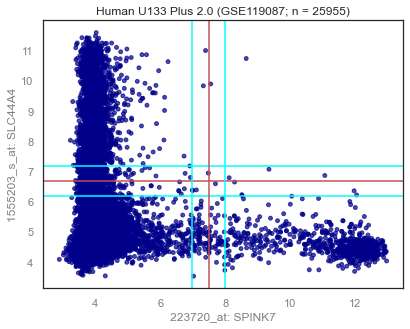

In [80]:
ana = BEeacAnalysis()
ana.getSurvival('GL1')
ax = plotBooleanPair(ana, "SPINK7", "SLC44A4", None, None, None, None, s=15, alpha=0.7)
ax.get_figure().savefig('spink7-slc44a4-gl1.png', dpi=200)
bs = ana.h.getBooleanRelation("SPINK7", "SLC44A4", ana.h.aRange(),
                             thrx0="thr0", thrx2="thr2", thry0="thr0", thry2="thr2")
bs

In [2]:
db = hu.Database("explore.conf")
dbid = "BES20"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()
title = h.getTitle()
print (title)
atype = h.getSurvName('c tissue (ch1)')
#atype = [re.sub("h.*", "", str(k)) for k in atype]
hu.uniq(atype)

Cummings 2017 BE Human (GSE100843; n = 76)


[7,
 'c tissue (ch1)',
 "Barrett's esophagus segment",
 'Normal esophageal squamous mucosa']